In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
w2 = ft.zeros_aligned((N,N,N), dtype='float32')

In [9]:
wiz = ('(fftw-3.3.5 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n)\n','(fftw-3.3.5 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_hc2cf2_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_n1bv_32_avx 0 #x10fdd #x10fdd #x0 #x47103458 #x1951f372 #xdb92cfd6 #x0773e53f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xea28ce24 #xc8cff39e #xa823c75f #x926c5590)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x660a6630 #xc4ce3c6a #x62a726bb #x4f6728ee)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x9382d45c #x3b4ef564 #x05a9af24 #x70bb1b32)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xb99abc38 #x8ead8d6b #xf0c5f1c4 #x54d4dbc2)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf91e412c #xc1e62b4b #xb772f42b #x91524b5a)\n  (fftwf_codelet_n1fv_32_avx 0 #x10bdd #x10bdd #x0 #x1d420f1a #x3fddf694 #x98ff69da #xa800a086)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1b302212 #x94fbdfad #xf5eb1b1e #x9cbc4116)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #xa721d607 #x9b236f81 #x2e409216 #x06902693)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #x7ec096c7 #x9497b3de #x122e6483 #x182f48b5)\n  (fftwf_rdft_rank0_register 6 #x10fdd #x10fdd #x0 #x31fc48ea #x91190d4a #x7e381771 #xc41342ed)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #xdbd34cc3 #x010b1fae #x10e8d12b #x05b15faf)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_indirect_register 0 #x10fdd #x10fdd #x0 #x1fa803ad #x53070662 #x6ab5a1a7 #x02747d82)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_dft_r2hc_register 0 #x10fdd #x10fdd #x0 #xe3e765fa #xee94098c #xea763318 #x79ec8609)\n  (fftwf_codelet_t2bv_32_avx 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xdeee3024 #xbaceb843 #xf78f49d6 #x68b91457)\n)\n','(fftw-3.3.5 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')

In [10]:
ft.import_wisdom(wiz)

(True, True, True)

In [11]:
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [12]:
start = time.time()

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.283607959747


In [13]:
ft.export_wisdom()

('(fftw-3.3.5 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n)\n',
 '(fftw-3.3.5 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_hc2cf2_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_n1bv_32_avx 0 #x10fdd #x10fdd #x0 #x47103458 #x1951f372 #xdb92cfd6 #x0773e53f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xea28ce24

In [15]:
start = time.time()
nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/admin/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

583.787979841


In [16]:
avgw2 = np.average(w2)
print("Average enstrophy: "+str(avgw2/2.))

Average enstrophy: 249.21836853


In [17]:
start = time.time()

chi = ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

5.32257509232


In [18]:
minw2 = np.min(w2)
maxw2 = np.max(w2)
avgOmega = avgw2

print("0.5 <w^2> : "+str(avgOmega/2))
print("<w^2> : "+str(avgOmega))
print("min w2 : "+str(minw2))
print("max w2 : "+str(maxw2))
print("min w2/<w^2> : "+str(minw2/avgOmega))
print("min w2/<w^2> : "+str(maxw2/avgOmega))

0.5 <w^2> : 249.21836853
<w^2> : 498.437
min w2 : 7.17736e-05
max w2 : 336529.0
min w2/<w^2> : 1.43997e-07
min w2/<w^2> : 675.168


In [19]:
start = time.time()

t = 5
c = 'r'

chi[:,:,:] = 0
chi[w2 > t*avgOmega] = 1

Np = np.sum(chi)

chi[:,:,:] = chi[:,:,:]/np.sqrt(Np)

end = time.time()
print(end-start)

5.8414349556


In [20]:
print(int(Np))

37382964


In [21]:
dx = isotropic1024coarse['dx']
ner = int(512*np.sqrt(3))
rbins = np.linspace(-0.5*dx,2*np.pi*np.sqrt(3)+0.5*dx,ner+1)

X  = np.zeros((N//2,N//2,N//2), dtype='float32')
Y  = np.zeros((N//2,N//2,N//2), dtype='float32')
Z  = np.zeros((N//2,N//2,N//2), dtype='float32')
r2 = np.zeros((N//2,N//2,N//2), dtype='float32')

iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')

In [22]:
start = time.time()

for i in range(N//2):
    X[i,:,:] = (i+0.5)*isotropic1024coarse['dx']
    
for j in range(N//2):
    Y[:,j,:] = (j+0.5)*isotropic1024coarse['dy']
    
for k in range(N//2):
    Z[:,:,k] = (k+0.5)*isotropic1024coarse['dz']

r2[:,:,:] = X[:,:,:]**2+Y[:,:,:]**2+Z[:,:,:]**2
r2rt = np.sqrt(r2)

end = time.time()
print(end-start)

4.47588801384


In [23]:
logrr = np.log(r2rt)

In [24]:
r2rtmin = np.min(logrr)
r2rtmax = np.max(logrr)
print(r2rtmin)
print(r2rtmax)

minlogrt = r2rtmin
maxlogrt = r2rtmax

-5.23744
1.69306


In [25]:
Nbins = 16
sc = (maxlogrt - minlogrt)/Nbins
bins = np.linspace(minlogrt,maxlogrt,num=Nbins,endpoint=True)

In [26]:
print(np.exp(bins)/isotropic1024coarse['dx'])

[  8.66025367e-01   1.37464004e+00   2.18196292e+00   3.46342464e+00
   5.49748582e+00   8.72614638e+00   1.38509917e+01   2.19856468e+01
   3.48977657e+01   5.53931418e+01   8.79254045e+01   1.39563789e+02
   2.21529275e+02   3.51632901e+02   5.58146080e+02   8.85943968e+02]


In [27]:
start = time.time()

fo[:,:,:] = chi[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cchi[:,:,:] = bo[:,:,:]

tmp = cchi*(cchi.conj())
#tmp[0,0,0] = 0.

bo[:,:,:] = tmp[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
corr[:,:,:] = fo[:,:,:]/(N**3)

end = time.time()
print(end-start)

28.524805069


In [28]:
print(corr[0,0,0])
print(corr[corr<0.])

0.999997
[]


In [29]:
iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 

In [30]:
start = time.time()

corrLoc,redges = np.histogram(logrr,range=(r2rtmin,r2rtmax)
                              ,bins = bins,weights=iCorr)
    
r2Loc,r2edges = np.histogram(logrr,range=(r2rtmin,r2rtmax)
                            ,bins = bins)

end = time.time()
print(end-start)

17.8947520256


In [31]:
print(corrLoc)
print(corrLoc/r2Loc)

[  9.99997079e-01   3.63989258e+00   5.25755978e+00   1.55385513e+01
   3.93178902e+01   1.10888672e+02   3.53216370e+02   1.16032690e+03
   3.86809546e+03   1.30365215e+04   4.44436719e+04   1.56721344e+05
   5.88515250e+05   2.26955300e+06   1.60646150e+06]
[ 0.99999708  0.60664876  0.40442768  0.24278986  0.14781162  0.1062152
  0.08417931  0.06960987  0.05799331  0.04882135  0.04164434  0.03670807
  0.03447131  0.03462133  0.03499999]


In [32]:
print(corrLoc.shape,redges.shape)
print(r2Loc.shape,r2edges.shape)

((15,), (16,))
((15,), (16,))


In [33]:
print(corrLoc/r2Loc)

[ 0.99999708  0.60664876  0.40442768  0.24278986  0.14781162  0.1062152
  0.08417931  0.06960987  0.05799331  0.04882135  0.04164434  0.03670807
  0.03447131  0.03462133  0.03499999]


In [34]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$log(r)$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

rbins = (redges[0:(Nbins-1)]+redges[1:Nbins])/2
fit = [-0.36067237,-3.30415286]
#plt.ylim(-5,1)
#plt.ylim(-5,1)

plt.grid()
plt.semilogy(rbins,corrLoc/r2Loc,'kx-')
#plt.plot(rbins,np.arcsinh(corrLoc/r2Loc),'kx-')
#plt.semilogy(rbins,np.exp(fit[1]+fit[0]*rbins),'k--') #np.exp(fit[1]+12)*(rbins**(fit[0]+2)),'k--')

In [35]:
start = time.time()

tl = [5,10,25,50,75]
c  = ['r','g','b','m','c']

lcorr = []
llogr = []

for t in tl:
    start = time.time()
    
    chi[:,:,:] = 0
    chi[w2 > t*avgOmega] = 1
    
    Np = np.sum(chi)
    chi[:,:,:] = chi[:,:,:]/np.sqrt(Np)
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    #tmp[0,0,0] = 0.
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(logrr,range=(r2rtmin,r2rtmax)
                                  ,bins = bins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(logrr,range=(r2rtmin,r2rtmax)
                                  ,bins = bins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 52.1269290447
time : 51.5272829533
time : 51.3575119972
time : 51.3163428307
time : 51.2119250298


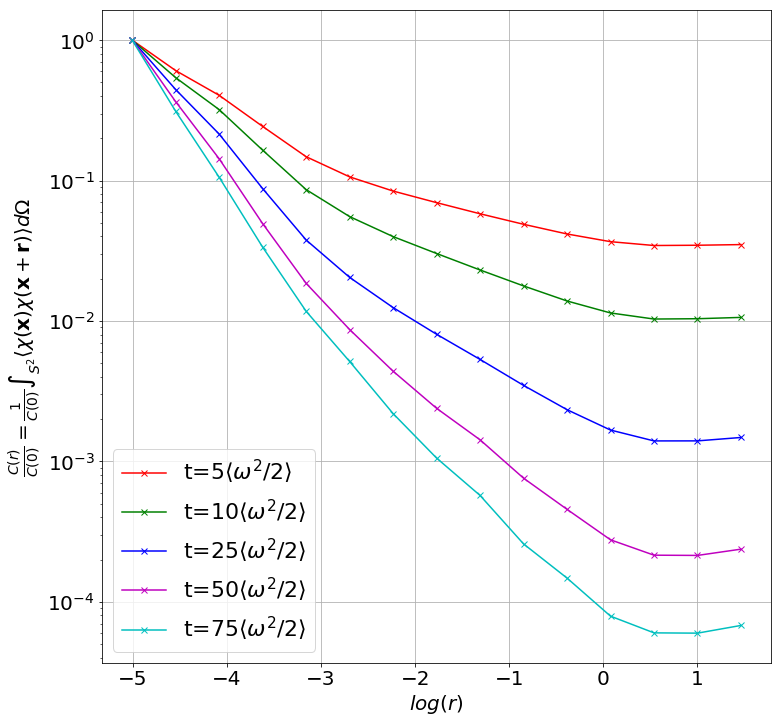

In [37]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(12,12))
plt.xlabel(r'$log(r)$', fontsize=20)
plt.ylabel(r'$\frac{C(r)}{C(0)} = \frac{1}{C(0)} \int_{S^2} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\Omega$', fontsize=20)

rbins = (redges[0:(Nbins-1)]+redges[1:Nbins])/2
fit = [-0.36067237,-3.30415286]

plt.grid()

for i in range(5):
    pcorr = lcorr[i]
    pr2 = llogr[i]
    plt.semilogy(rbins,pcorr/pr2,c[i]+'x-',label=r't='+str(tl[i])+r'$\langle\omega^2/2\rangle$')
    
plt.legend(loc='lower left',prop={'size':22})
plt.savefig("logbins-enstrophy-corr-dcON.pdf")